In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('eda_label_encoding_dataset.csv')

In [2]:
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [3]:
df.shape

(10479003, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


In [53]:
# Create a new data frame with the number of strikes per month.
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name().str.slice(stop=3)
#Make the month name categorical so they are in calendar instead of alphaetic
# order when we plot them
months = ['Jan','Feb','Mar','Apr','May','Jun','Aug', 'sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'],  categories = months, ordered = True)
df['year'] = df['date'].dt.strftime('%Y')

df_by_month = df.groupby(['year', 'month'],  observed=False).sum(['numeric only']).reset_index()
df_by_month.head() 

,year,month,number_of_strikes
0,2016,Jan,313595
1,2016,Feb,312676
2,2016,Mar,2057527
3,2016,Apr,2636427
4,2016,May,5800500


In [16]:
# Create a categorical variable variable by bucketing the number of lighning strikes
# per month into severeness levels based on quantities.
df_by_month['strike_level'] = pd.qcut(
    df_by_month['number_of_strikes'],
    4,
    labels =['Mild', 'Scattered', 'Heavy', 'Severe'])
df_by_month.head(23)

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,313595,Mild,0
1,2016,Feb,312676,Mild,0
2,2016,Mar,2057527,Heavy,2
3,2016,Apr,2636427,Heavy,2
4,2016,May,5800500,Severe,3
5,2016,Jun,6647930,Severe,3
6,2016,Aug,7250442,Severe,3
7,2016,sep,0,Mild,0
8,2016,Oct,1285451,Heavy,2
9,2016,Nov,367853,Mild,0


In [17]:
# Assign numerical values to the strikes levels
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head(12)

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,313595,Mild,0
1,2016,Feb,312676,Mild,0
2,2016,Mar,2057527,Heavy,2
3,2016,Apr,2636427,Heavy,2
4,2016,May,5800500,Severe,3
5,2016,Jun,6647930,Severe,3
6,2016,Aug,7250442,Severe,3
7,2016,sep,0,Mild,0
8,2016,Oct,1285451,Heavy,2
9,2016,Nov,367853,Mild,0


In [44]:
#Dummy variales: Variales with values of 0 or 1, which indicate the presence or absence of something
# Create dummy variables from strike levels
pd.get_dummies(df_by_month['strike_level'], dtype=float)


,Mild,Scattered,Heavy,Severe
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0


In [33]:
#  Format data frame indices to prepare for plotting
#df.pivot_table(index='foo', columns='bar', values='baz')
df_by_month_plot = df_by_month.pivot(index='year', columns='month', values='strike_level_code')
df_by_month_plot.head() 

month,Jan,Feb,Mar,Apr,May,Jun,Aug,sep,Oct,Nov,Dec
year,,,,,,,,,,,
2016,0,0,2,2,3,3,3,0,2,0,0
2017,1,1,2,2,3,3,3,0,1,1,0
2018,1,2,1,2,2,3,3,0,1,1,0


In [48]:
# Format data Frame indices to prepare for plotting.
#HeatMap: A type of data visuaization that depicts the magnitude of an instance or 
#set of values based on two colors

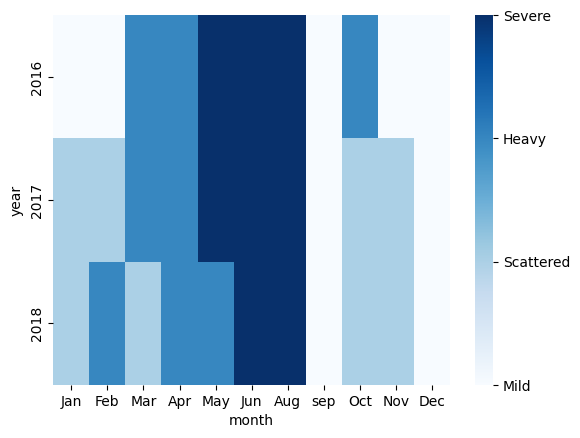

In [51]:
# Make a heatmap showing which months over the years had the most severe lightning.
ax = sns.heatmap(df_by_month_plot,  cmap = 'Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0,1,2,3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()